<a href="https://colab.research.google.com/github/ayushNautiyal35/ML_basic_to_advanced/blob/main/California_housing_price5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing libraries



In [104]:
import pandas as pd
import urllib.request

We make the function to import our dataset

In [105]:
def load_housing_data():
  url="https://raw.githubusercontent.com/ayushNautiyal35/ML_basic_to_advanced/main/California_housing_prices/dataset/housing.csv"

  return pd.read_csv(url)


In [106]:
housing=load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


info() method is useful to get a quick description of the data, in particular the total number of rows,eachattribute type, and the number of non null

In [107]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In the given dataset all the values are numerical except ocean_proximity so we are going to count how many districts belong to each category by using value counts method

In [108]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

describe method show the summary of each numerical attribute

In [109]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


the std value show the standard deviation which measures how dispersed the values are. The 25%,50% and 75% rows show the corresponding percentile,it indicates the value below which a given percentage of observations in a group of observations fall.
Ex- 25% of the districts  have a housing_median_age lower than 18,while 50% are lower than 29 and 75% are lower than 37.
These are often called 25th percentile(first quartile), median,75th percentile(third quartile).

Another way to take feel is from histogram

In [110]:
import matplotlib.pyplot as plt


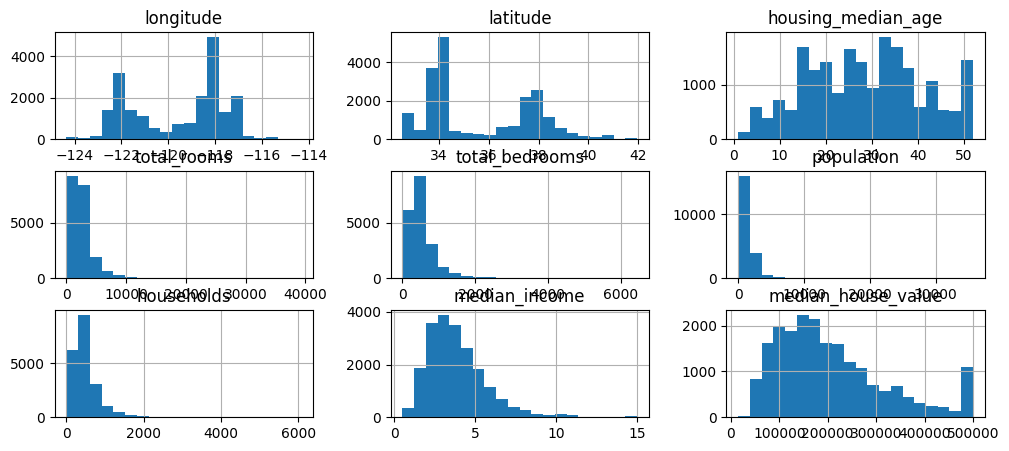

In [111]:
housing.hist(bins=20,figsize=(12,5))
plt.show()

**2. Test Data**

to create a test data set fro the data.

Snooping bias- When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as expected.   

Method 1: to pick the random values let us suppose 20% of the sample data.

In [112]:
import numpy as np

NumPy is a Python library used for working with arrays.

It also has functions for working in domain of linear algebra, fourier transform, and matrices.

NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely.

NumPy stands for Numerical Python.

In [113]:
def shuffle_and_split_data(data,test_ratio):
  shuffled_indices=np.random.permutation(len(data))
  size=int(len(data)*test_ratio)
  test_indices=shuffled_indices[:size]
  train_indices=shuffled_indices[size:]
  return data.iloc[train_indices],data.iloc[test_indices]

1. we take the random value fron the dataset.permutation(x) actually returns a new variable and the original data is not changed. Where as numpy. random. shuffle(x) has changed original data and does not return a new variable.

2.we are defining 20% size.

3. we are taking the elements upto the size in shuffled indices array.

4.same as above but we are taking from size here.

5. The iloc function in Python returns a view of the selected rows and columns from a Pandas DataFrame. This view can be used to access, modify, or delete the selected data. The returned view is a Pandas DataFrame or Series, depending on the number of rows or columns selected.

In [114]:
train_set,test_set=shuffle_and_split_data(housing,0.2)
len(test_set)

4128

In [115]:
len(train_set)

16512

In [116]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0,INLAND
577,-122.06,37.73,5.0,3596.0,467.0,1738.0,512.0,7.0568,412500.0,NEAR BAY
6337,-117.96,33.98,25.0,1259.0,184.0,599.0,170.0,5.7407,302200.0,<1H OCEAN
12463,-121.42,38.57,38.0,1878.0,338.0,710.0,342.0,3.7731,161400.0,INLAND
8646,-118.40,33.87,45.0,2093.0,497.0,842.0,472.0,6.3231,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
11569,-118.01,33.77,33.0,1387.0,238.0,890.0,264.0,5.4220,204100.0,<1H OCEAN
9628,-120.35,37.31,17.0,605.0,159.0,416.0,83.0,2.0000,87500.0,INLAND
10805,-117.94,33.62,25.0,1188.0,264.0,569.0,249.0,3.6607,500001.0,<1H OCEAN
7422,-118.20,33.96,37.0,2127.0,533.0,2021.0,480.0,2.9773,164600.0,<1H OCEAN


When we are running it again it produce different set by ths your ML algorithms are going to learn everything.

Method 2: To have stable train/test split even after updating dataset a common solution is to use each instance identifier to decide whether or not it should go in test we can use hase.

In [117]:
from zlib import crc32

With the help of zlib.crc32() method, we can compute the checksum for crc32 (Cyclic Redundancy Check) to a particular data. It will give 32-bit integer value as a result by using zlib.crc32() method.
The checksum is a kind of error Detection method in Computer Networks. This method used by the higher layer protocols and makes use of Checksum Generator on the Sender side and Checksum Checker on the Receiver side

In [118]:
def is_id_in_test_set(identifier,test_ratio):
  return crc32(np.int64(identifier))<test_ratio * 2**32

np. int64 is an 8-bytes-wide signed integer.
For numeric data types, double-asterisk (**) is defined as an Exponentiation(power).
2 to the Power of 32 is equal to 4294967296.
4294967296*0.2= 858993459.2.

In [119]:
def split_data_with_id_hash(data,test_ratio,id_column):
  ids=data[id_column]
  in_test_set=ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
  return data.loc[~in_test_set],data.loc[in_test_set]

Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series. It comes as a huge improvement for the pandas library as this function helps to segregate data according to the conditions required due to which it is efficiently used in data science and machine learning.
Python Lambda Functions are anonymous function means that the function is without a name. As we already know that the def keyword is used to define a normal function in Python. Similarly, the lambda keyword is used to define an anonymous function in Python.


Unfortunately the housing dataset doesn't have an identifier column.The simplest solution is to use the row index as id:

In [120]:
housing_with_id=housing.reset_index()
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"index")

In [121]:
len(test_set)

4128

In [122]:
len(train_set)

16512

In [123]:
test_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


But if we are going to use row index as id then we ensure that no row gets delted it is difficult so we choose most satble features which is not going to change in this case longitude and latitude

In [124]:
housing_with_id['id']=housing['longitude']*1000+housing['latitude']
train_set,test_set=split_data_with_id_hash(housing_with_id,0.2,"id")

In [125]:
housing_with_id['id'].head()

0   -122192.12
1   -122182.14
2   -122202.15
3   -122212.15
4   -122212.15
Name: id, dtype: float64

Method 3:Scikit-Learn provides a few function to split data.One of the simplest wap is train_test_split it is like like shuffle and split data we discussed above which randomly divides.

In [126]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

random_state parameter allows you to set random generator seed.
The seed() method is used to initialize the random number generator.

The random number generator needs a number to start with (a seed value), to be able to generate a random number.

In [127]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


Method 4: So far we have discussed the random sampling method and this is generally fine if your dataset is large enough but if it is not you run the risk of introducing a significant sampling bias.
Ex: A company decides to call 1000 persons to ask some questions so they will not call any 1000 persons in phonebook they try to ensure that they are representative of whole population like in us 51.1% are female and 48.9% malesso they will call 511 females and 489 males.

This is called stratified sampling: the data is divided into homogenous groups called strata and the right number of instances are selected from strata to guaranteee that test data is representation of whole data.

In [128]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

Representation as bar graph

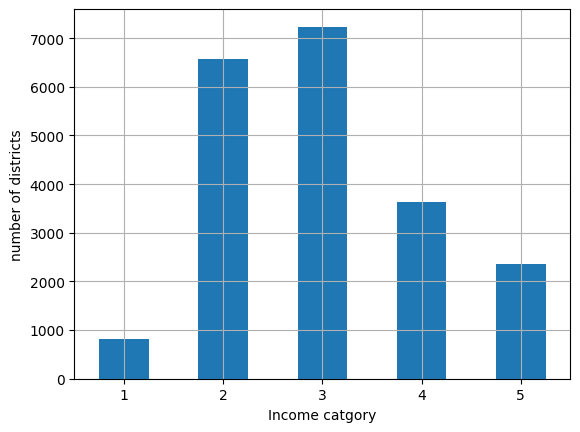

In [129]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income catgory")
plt.ylabel('number of districts')
plt.show()

Split using strat

In [130]:
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,stratify=housing['income_cat'],random_state=42)

In [131]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


Now no need of income_cat so we can delete it

In [132]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

In [133]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


#**3. Explore and Visualize the Data to gain insights**

In [134]:
housing=strat_train_set.copy()

### Visualizing the geographical data

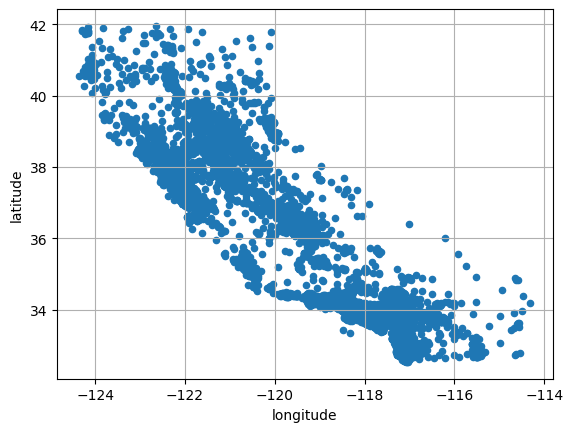

In [135]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True)
plt.show()

It is hard to see any particular pattern so we set alpha=0.2 it makes it much easier to visualize the places where there is a high density of data points

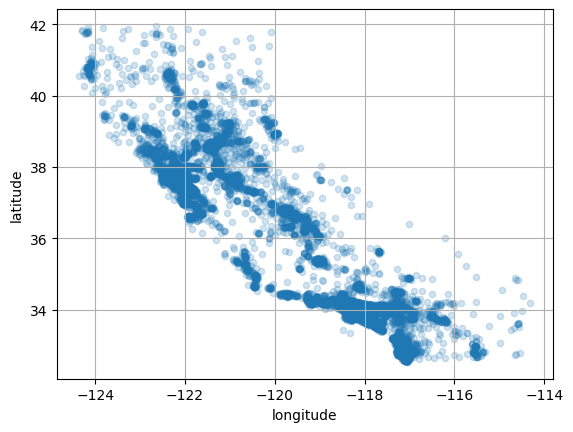

In [136]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

We ca use a predefined color map called jet which ranges from blue to red

<Axes: xlabel='longitude', ylabel='latitude'>

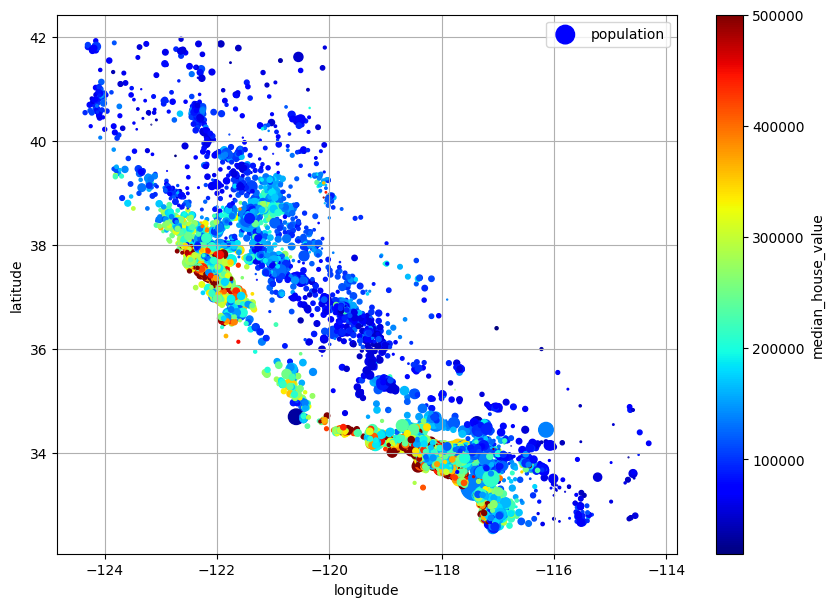

In [137]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,s=housing["population"]/100,label="population",c="median_house_value",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,7))

#Look for Correlations

What Is the Correlation Coefficient?
The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. Its values can range from -1 to 1. A correlation coefficient of -1 describes a perfect negative, or inverse, correlation, with values in one series rising as those in the other decline, and vice versa. A coefficient of 1 shows a perfect positive correlation, or a direct relationship. A correlation coefficient of 0 means there is no linear relationship.

Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

In [138]:
corr_matrix=housing.corr()
corr_matrix

<ipython-input-138-b4768b93bcc0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [139]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

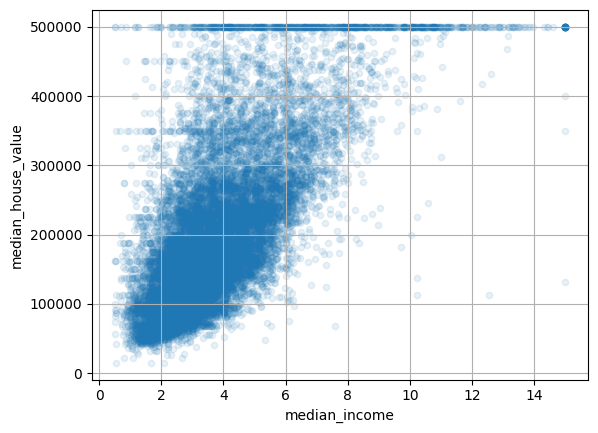

In [140]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)

##**4. Prepare the data for ML Algorithms**

#Clean the data

lets bring the data into its original form

*   drop is used to create a copy it is not going to affct original
*   We define in labels and predictors.



In [141]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [142]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [143]:
housing_labels=strat_train_set["median_house_value"].copy()
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

To clean the data we use three methods:


1.  Get rid of corresponding values
2.  Get rid of whole attribute.
3.  Set the missing value to some value9zero,mean,median,etc..)





In [144]:
housing.dropna(subset=["total_bedrooms"],inplace=True)
housing["total_bedrooms"]

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16354, dtype: float64

In [145]:
housing=strat_train_set.drop("median_house_value",axis=1)

In [146]:
housing.drop("total_bedrooms",axis=1)
housing["total_bedrooms"]

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [147]:
housing=strat_train_set.drop("median_house_value",axis=1)

In [148]:
median=housing["total_bedrooms"].median();
housing["total_bedrooms"].fillna(median,inplace=True)
housing["total_bedrooms"]

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

We choose option 3 as it is less destructive. we can use scikit-Learn class:SimpleImputer. The benefit of using it is that it will make it possible to impute missing values not on training set but also on validation and test set.

In [149]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

Since median can be computed for numerical attribute only so we calculate all the numerical median excluding ocean_proximity

In [150]:
housing_num=housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

now imputer have median of each attribute and stored result in statistics_ instance variable only total_bedrooms have missing values but we implement for all for safer to apply in new data ehich come when system goes live.

In [151]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [152]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [153]:
x=imputer.transform(housing_num)
x

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

x do not have column name so we use DAtaFrame for this

In [154]:
housing_tr=pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


We can use mean ,most_frequent,constant in strategy.
KNNImputer replaces each missing value with the mean of knearest mean.

#Handling Text and Categorical Attributes

So far we have dealt with only numerical attribute but we have the data with text attribute ocean proximity

In [155]:
housing_cat=housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


This attribute is categorical attribute and many ml algorithms do not dealt with text so we convert into numerical atttribute. For this we use OrdinalEncoder fronm Scikit-Learn

In [156]:
from sklearn.preprocessing import OrdinalEncoder

In [157]:
ordinal=OrdinalEncoder()
housing_cat_encoded=ordinal.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [158]:
ordinal.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this type of representation is that ML algorithms will assume that two nearby values are more similar than two distinct values ex 0&1 is similar but 1&4 is disimilar.


So to deal with the issue we use OneHotEncoder because only one attribute will be equal to 1 and others will be 0.

In [159]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

By default the output of OneHotEncoder is sparse matrix. A sparse matrix is a special case of a matrix in which the number of zero elements is much higher than the number of non-zero elements

In [160]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

to convert sparse into numpy array we use toarray() method

In [161]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Pandas have get_dummies() method which converts each categorical feature into a onehotrepresentation

In [162]:
df_test=pd.DataFrame({'ocean_proximity':['INLAND',"NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


get_dummies loks simple and nice so why do we prefer to use the OneHotEncoder?

Because 1hotencoder remembers which categories it was trained on.This is very important because once your model is in production it should fed exactly the same features as during training.

In [163]:
cat_encoder=OneHotEncoder(sparse=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [164]:
cat_encoder.transform(df_test)


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

get_dumies for unknown values generate a column.

In [165]:
df_test_unknown=pd.DataFrame({'ocean_proximity':['<2h ocean',"ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2h ocean,ocean_proximity_ISLAND
0,1,0
1,0,1


But in 1hotencoder there is an unknnown category which detect error and set 0 if we set it ignore

In [166]:
cat_encoder.handle_unknown="ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

get_features_names_in show the attribute name used by ransform or predict while get_features_names_out shows the DataFrame

In [167]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [168]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

#Feature Scaling and Transformation

With few exceptions Ml algorithms  don't perform well when the input numerical attributes have very different scales. This is the case for housing data the total number of rooms ranges from about 6 to 39,320 while the meadian incomes only range from 0 to 15. Without any scaling, most models will be biased toward ignoring the median income and focusing more on the number of rooms.

Never used fit() or fit_transform() for anything else than training set. Once you have trained scaler,you can use transform().

There are 2 commmon ways to get attributes to same scale:

1. **Min-max scaling:**

For each attribute the values are shifted to 0 to 1 but neural networks works best with -1 to 1. This is performed by subtracting the min value and dividing the difference between the min and max. Scikit-Learn provides a transformer called MinMaxScaler for this.

In [169]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [170]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled= min_max_scaler.fit_transform(housing_num)
housing_num_min_max_scaled

array([[-0.42430279,  0.27098831,  0.09803922, ..., -0.87477228,
        -0.73711725, -0.76914801],
       [ 0.41832669, -0.88310308, -0.76470588, ..., -0.88721657,
        -0.71396565, -0.19485248],
       [ 0.05776892, -0.39851222,  0.68627451, ..., -0.96277923,
        -0.88872293, -0.67240452],
       ...,
       [-0.6752988 ,  0.25398512,  0.84313725, ..., -0.9744948 ,
        -0.93651979, -0.63037751],
       [-0.67131474,  0.22635494, -0.49019608, ..., -0.93245326,
        -0.81366692, -0.49014496],
       [-0.55976096,  0.57917109,  0.01960784, ..., -0.96513355,
        -0.92718447, -0.63697052]])

2. **Standardization**

It first subtracts the mean value then it divides the results by the standard deviation unlike min-max it does not restrict values to specific range.however it is less affected by outliers.

In [171]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

When a feture have heavy tail (mean all values near to mean) then it give result which are dense or squash in samll range so we use square root of the value or if it has strong heavy tail then we use logarithm.

Another approach to handle  heavy tailed feature in bucketizing the feature. This means chopping its distribution into roughly equal sized buckets and replacing each feature value with the index of bucket it belongs to.

When a feture has a multimodal distribution such as housing_median_age featue it can be also helpful to bucketize it but this it is taken as categories not as numerical attributes so we use OneHotEncoder. This approach will allow the regression model to work easily learn different rules for different ranges of this feature.

Another approach to transforming multimodal distribution is to add a fetures for each modes representing the similarity between the housing_median_age and that particular node.The similarity is computed using radial basis fuction(RBF)- any fuction that depends only on distance between the input value and fixed point.The most commonly RBF is Gaussian RBF.

In [172]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35=rbf_kernel(housing[["housing_median_age"]],[[35]],gamma=0.1)
age_simil_35

array([[2.73237224e-02],
       [8.93948745e-35],
       [3.03539138e-04],
       ...,
       [4.57533877e-08],
       [7.04065961e-20],
       [1.66155727e-03]])

inverse_transform() method is used to compute the inverse of their transformation

#Transformation Pipelines

Scikit-Learn provides the Pipeline class to help wit sequences of trnsformation.

In [173]:
from sklearn.pipeline import make_pipeline
num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [174]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

Now for the categorical columns we use make column selector fuction which returns selector fuction so that you can automatically select all features of given type and make_column_transfrome wich chooses name.

In [175]:
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

In [176]:
from sklearn.compose import make_column_selector,make_column_transformer
preprocessing= make_column_transformer((num_pipeline,make_column_selector(dtype_include=np.number)),(cat_pipeline,make_column_selector(dtype_include=object)))

In [177]:
housing_prepared=preprocessing.fit_transform(housing)

In [178]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7928a5616d70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7928a5615e10>)])

##**5.Select and Train your model**

#Train and Evaluate on the training set

In [179]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7928a5616d70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7928a5615e10>)])),
                ('linearregression', LinearRegression())])

In [180]:
housing_predictions=lin_reg.predict(housing)
housing_predictions[:5].round(-2)


array([ 89000., 305400., 153300., 184300., 246800.])

In [181]:
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

Now lets find the mean square errror (rmse) for it.

In [182]:
from sklearn.metrics import mean_squared_error
lin_rmse=mean_squared_error(housing_labels,housing_predictions,squared=False)
lin_rmse

69050.56219504567

It is not accepting it underfitting so now we will try for stronger models.

In [183]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7928a5616d70>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7928a5615e10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [184]:
housing_predictions=tree_reg.predict(housing)
tree_rmse=mean_squared_error(housing_labels,housing_predictions,squared=False)
tree_rmse

0.0

What it means no error? Not possible so we have to move for better evaluation using cross validation.

In [185]:
from sklearn.model_selection import cross_val_score
tree_rmse=-cross_val_score(tree_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(tree_rmse).describe()

count       10.000000
mean     69072.450484
std       2415.959081
min      64901.969879
25%      67504.298859
50%      68934.943147
75%      70790.547973
max      73243.464593
dtype: float64

It is showing worst result than linear regression so lets go for another one

In [186]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmse=-cross_val_score(forest_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(forest_rmse).describe()

count       10.000000
mean     49411.510750
std       2234.210314
min      45939.137891
25%      47714.619818
50%      49178.955277
75%      50816.473222
max      53287.221304
dtype: float64

#Fine Tune Your Model

1. Grid Search

One option to fiddle hyperparameters manuallly until you find a great combination of hyperparameter values.Instead,you can use Scikit-Learn GridSearchCV class to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out,and it will use cross validation to evaluate all the possible combinationsof hyperparameter values.

In [187]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [188]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [189]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [190]:
cv_res=pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score",ascending=False,inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,2.284114,0.328961,0.039194,0.003247,8,30,NaN,"{'max_features': 8, 'n_estimators': 30}",-2.510597e+09,-2.359285e+09,...,-2.494115e+09,8.533070e+07,1,-3.787455e+08,-3.829903e+08,-3.827354e+08,-3.768571e+08,-3.788261e+08,-3.800309e+08,2.418640e+06
8,2.621293,0.450242,0.062438,0.023516,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.534328e+09,-2.396127e+09,...,-2.517823e+09,7.886174e+07,2,-3.782309e+08,-3.923535e+08,-3.808534e+08,-3.735470e+08,-3.870388e+08,-3.824047e+08,6.614228e+06
5,1.108630,0.007140,0.035514,0.000673,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.544884e+09,-2.349126e+09,...,-2.537193e+09,1.101762e+08,3,-4.040469e+08,-3.992266e+08,-3.928371e+08,-3.830632e+08,-3.974442e+08,-3.953236e+08,7.103885e+06
10,0.876250,0.123744,0.015133,0.002066,8,10,NaN,"{'max_features': 8, 'n_estimators': 10}",-2.686526e+09,-2.580962e+09,...,-2.688363e+09,6.264706e+07,4,-4.808173e+08,-5.051745e+08,-5.021079e+08,-4.855610e+08,-4.997119e+08,-4.946745e+08,9.653593e+06
17,0.776957,0.111841,0.017478,0.000631,4,10,False,"{'bootstrap': False, 'max_features': 4, 'n_est...",-2.668239e+09,-2.512825e+09,...,-2.692754e+09,1.213850e+08,5,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-1.186980e+01,-2.373959e+00,4.747918e+00


2. Randomized Search

This class can be used in the same way as GridSearchCV class,but instead of trying out all possible  combinations it evaluates a fixed number of combinations,selecting a random value at each iteration.

In [191]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [197]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79289a1b2d40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79289a1b3af0>},
                   random_state=42, scoring='neg_mean_squared_error')

#Evaluate your System On Test Set

In [198]:
final_model=rnd_search.best_estimator_ #includes preprocessing



In [205]:
x_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()

x_test_prepared = preprocessing.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_rmse=mean_squared_error(y_test,final_predictions,squared=False)
print(final_rmse)

46511.074668417656


To get the interval we use stats.t.interval for 95%

In [207]:
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([44588.64446065, 48357.1392742 ])